In [1]:
##################################################################################################
#File: prob5.py
#Author: Joshua D. Rego
#Description: Fourier Domain Fun
##################################################################################################

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipdb

debug = 0

In [2]:
##################################################################################################

########## Section 5.a - Read in image and plot Fourier transform (magnitude and phase) ##########

In [3]:
# Read in image
img = cv2.imread('./elephant.jpeg', 0)

In [4]:
# Perform FFT on image
img_f = np.fft.fft2(img)
# Wrap Shift the FFT for plotting
img_fshift = np.fft.fftshift(img_f)
# FFT Magnitude
img_mag = 20 * np.log(np.abs(img_fshift))
# FFT Phase
img_phase = np.angle(img_fshift)

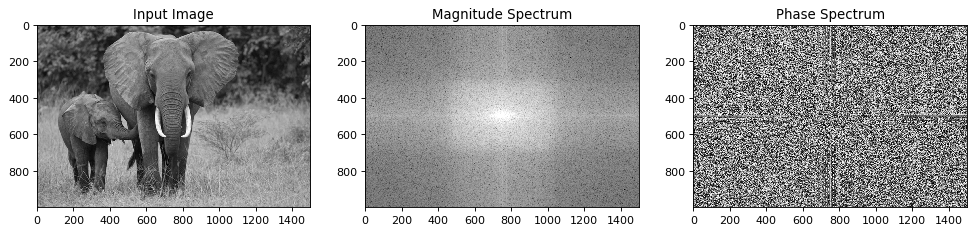

In [5]:
# Plot Input Image
fig=plt.figure(figsize=(15, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
# Plot Image Magnitude
plt.subplot(1,3,2)
plt.imshow(img_mag, vmin=0, vmax=255, cmap='gray')
plt.title('Magnitude Spectrum')
# Plot Image Phase
plt.subplot(1,3,3)
plt.imshow(img_phase, cmap='gray')
plt.title('Phase Spectrum')
plt.show()

In [6]:
##################################################################################################

########## Section 5.b - Implement low-pass, high-pass, and diagonal bandpass filter #############

In [7]:
# Define Low-pass filter kernel
kern_lp = np.ones((5,5)) / 49
print(kern_lp)

# Determine padding dimensions
m_pad = (img.shape[0] - kern_lp.shape[0])
n_pad = (img.shape[1] - kern_lp.shape[1])

# Pad the kernel
kern_lp_pad = np.pad(kern_lp, (((m_pad+1)//2,m_pad//2),((n_pad+1)//2,n_pad//2)), 'constant')

# Inverse shift the kernel to wrap around the edges
kern_lp_pad = np.fft.ifftshift(kern_lp_pad)
if debug == 1:
    print(); print(kern_lp_pad)

[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816]]


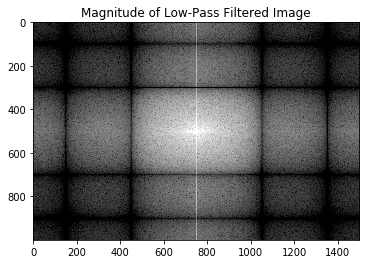

In [8]:
# FFT of kernel
kern_f = np.fft.fft2(kern_lp_pad)
# Multiply image and kernel in frequency
img_f_filter = img_f * kern_f
# Shift to display image
img_f_filtshift = np.fft.fftshift(img_f_filter)
# Replace 0 with very small number to avoid log(0)
img_f_filtshift[np.where(img_f_filtshift==0)] = 1 * 10**-10
# Plot Magnitude of filtered image
plt.imshow(20*np.log(np.abs(img_f_filtshift)), vmin=0, vmax=255, cmap='gray')
plt.title('Magnitude of Low-Pass Filtered Image')
plt.show()

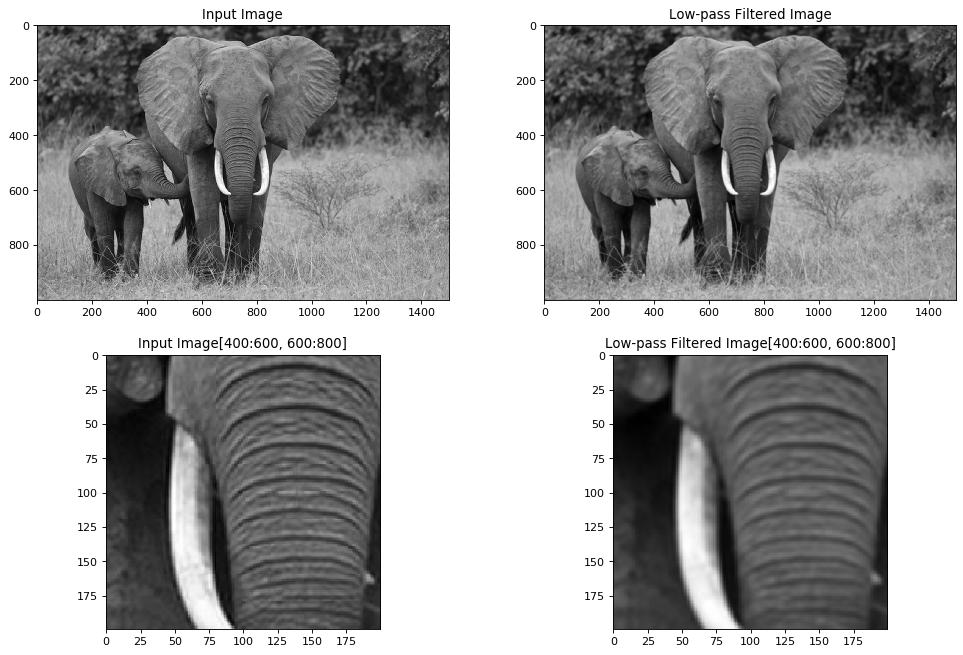

In [9]:
# Perform inverse FFT on filtered image
img_filter = np.real(np.fft.ifft2(img_f_filter))
# Plot images
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.subplot(2,2,2)
plt.imshow(img_filter, cmap='gray')
plt.title('Low-pass Filtered Image')
plt.subplot(2,2,3)
plt.imshow(img[400:600, 600:800], cmap='gray')
plt.title('Input Image[400:600, 600:800]')
plt.subplot(2,2,4)
plt.imshow(img_filter[400:600, 600:800], cmap='gray')
plt.title('Low-pass Filtered Image[400:600, 600:800]')
plt.show()

In [10]:
# Define High-Pass Filter kernel
kern_hp = kern_lp * -9; kern_hp[2,2] = kern_hp[2,2]*-24
print(kern_hp)
# Determine padding dimensions
m_pad = (img.shape[0] - kern_hp.shape[0])
n_pad = (img.shape[1] - kern_hp.shape[1])
# Zero-pad kernel to image size
kern_hp_pad = np.pad(kern_hp, (((m_pad+1)//2,m_pad//2),((n_pad+1)//2,n_pad//2)), 'constant')
kern_hp_pad = np.fft.ifftshift(kern_hp_pad)
print(); print(kern_hp_pad)

[[-0.18367347 -0.18367347 -0.18367347 -0.18367347 -0.18367347]
 [-0.18367347 -0.18367347 -0.18367347 -0.18367347 -0.18367347]
 [-0.18367347 -0.18367347  4.40816327 -0.18367347 -0.18367347]
 [-0.18367347 -0.18367347 -0.18367347 -0.18367347 -0.18367347]
 [-0.18367347 -0.18367347 -0.18367347 -0.18367347 -0.18367347]]

[[ 4.40816327 -0.18367347 -0.18367347 ...  0.         -0.18367347
  -0.18367347]
 [-0.18367347 -0.18367347 -0.18367347 ...  0.         -0.18367347
  -0.18367347]
 [-0.18367347 -0.18367347 -0.18367347 ...  0.         -0.18367347
  -0.18367347]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.18367347 -0.18367347 -0.18367347 ...  0.         -0.18367347
  -0.18367347]
 [-0.18367347 -0.18367347 -0.18367347 ...  0.         -0.18367347
  -0.18367347]]


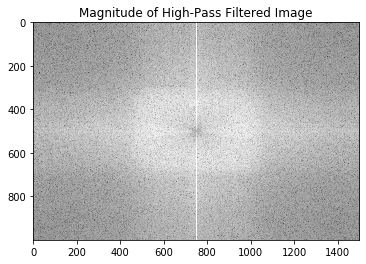

In [11]:
# Take FFT of kernel
kern_f = np.fft.fft2(kern_hp_pad)
# Multiply image and kernel in frequency
img_f_filter = img_f * kern_f
# Shift to display
img_f_filtshift = np.fft.fftshift(img_f_filter)
# Plot magnitude of filtered image
plt.imshow(20 * np.log(np.abs(img_f_filtshift)), vmin=0, vmax=255, cmap='gray')
plt.title('Magnitude of High-Pass Filtered Image')
plt.show()

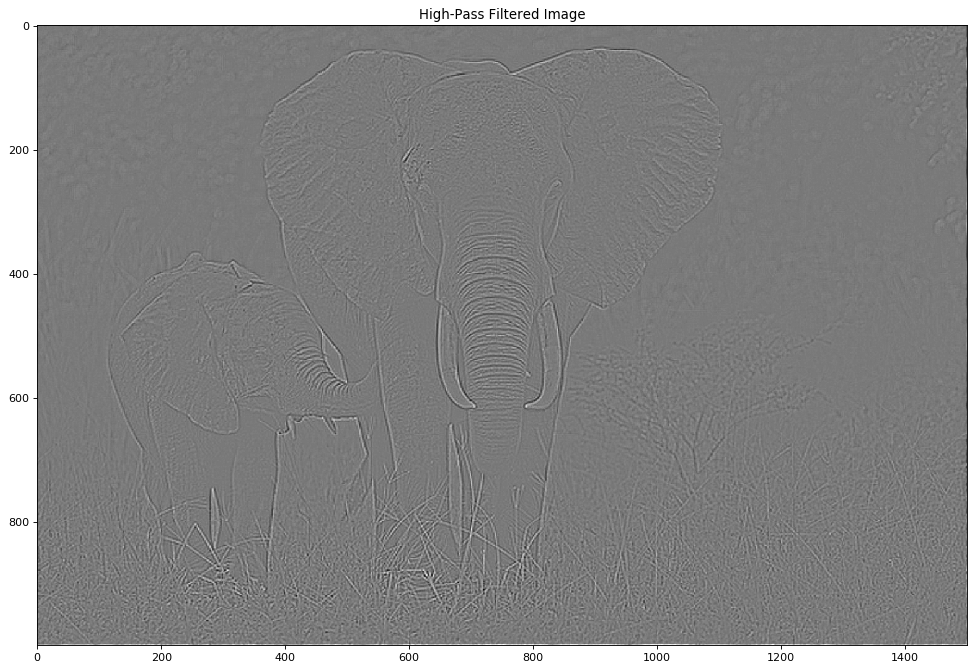

In [12]:
# Inverse FFT on filtered image
img_filter = np.real(np.fft.ifft2(img_f_filter))
# Plot image
fig=plt.figure(figsize=(15, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img_filter, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.show()

In [13]:
# Define Band-pass filter kernel
c = 2
kern_bp = np.array([[c, -1, -1], [-1, c, -1], [-1, -1, c]])
print(kern_bp)

# Determine padding dimensions
m_pad = (img.shape[0] - kern_bp.shape[0])
n_pad = (img.shape[1] - kern_bp.shape[1])

# Pad the kernel
kern_bp_pad = np.pad(kern_bp, (((m_pad+1)//2,m_pad//2),((n_pad+1)//2,n_pad//2)), 'constant')

# Inverse shift the kernel to wrap around the edges
kern_bp_pad = np.fft.ifftshift(kern_bp_pad)
print(); print(kern_bp_pad)

[[ 2 -1 -1]
 [-1  2 -1]
 [-1 -1  2]]

[[ 2 -1  0 ...  0  0 -1]
 [-1  2  0 ...  0  0 -1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [-1 -1  0 ...  0  0  2]]


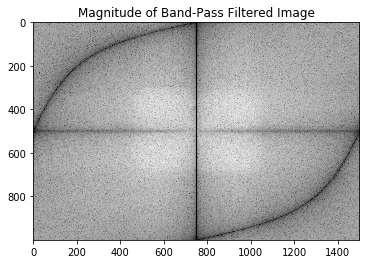

In [14]:
# FFT of kernel
kern_f = np.fft.fft2(kern_bp_pad)
# Multiply image and kernel in frequency
img_f_filter = img_f * kern_f
# Shift to display
img_f_filtshift = np.fft.fftshift(img_f_filter)
# Switch Zeros to very small number to avoid log(0)
img_f_filtshift[np.where(img_f_filtshift==0)] = 1 * 10**-10
# Plot Magnitude of Diagonal Band-Pass Filtered Image
plt.imshow(20*np.log(np.abs(img_f_filtshift)), vmin=0, vmax=255, cmap='gray')
plt.title('Magnitude of Band-Pass Filtered Image')
plt.show()

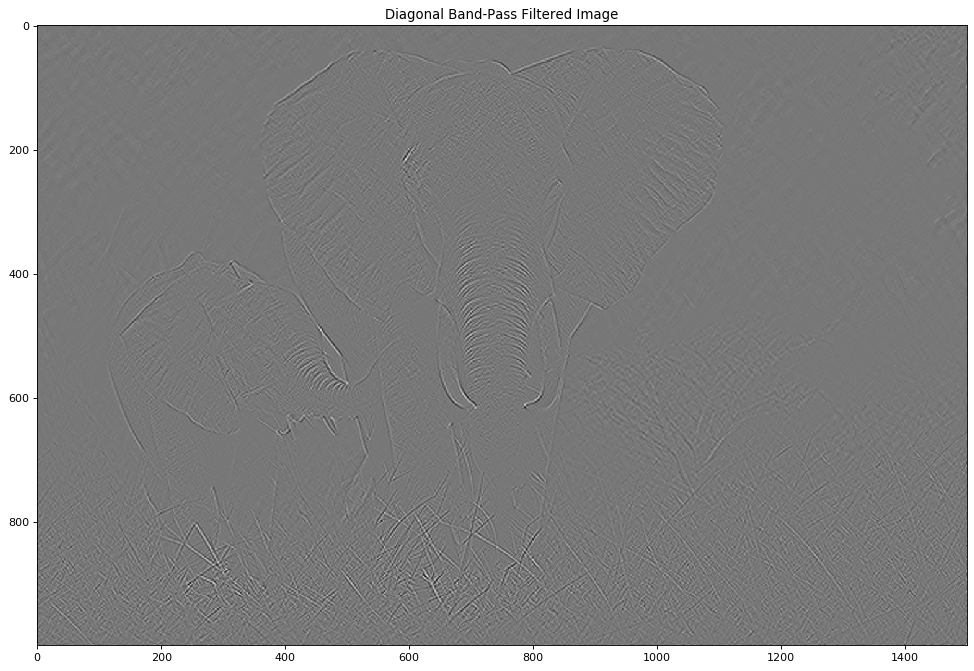

In [15]:
# Inverse FFT of filtered image
img_filter = np.real(np.fft.ifft2(img_f_filter))

# Plot filtered image
fig=plt.figure(figsize=(15, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img_filter, cmap='gray')
plt.title('Diagonal Band-Pass Filtered Image')
plt.show()

In [16]:
##################################################################################################

########## Section 5.c - Phase Swapping ##########################################################

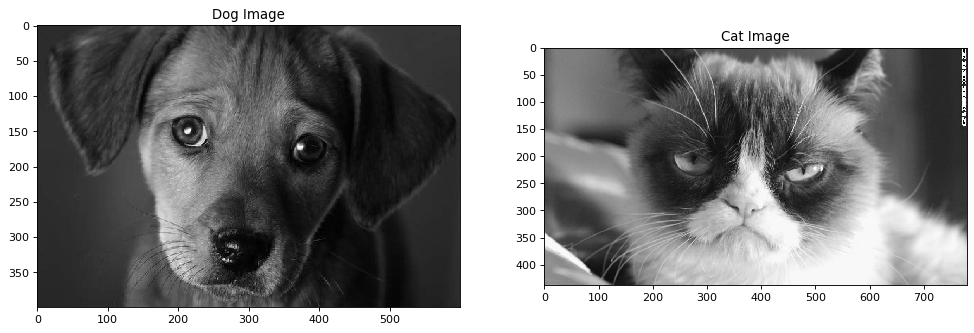

(400, 600) (438, 780)


In [3]:
# Read in images
dog = cv2.imread('./dog.jpg', 0)
cat = cv2.imread('./cat.jpg', 0)
# Plot images
fig=plt.figure(figsize=(15, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(dog, cmap='gray')
plt.title('Dog Image')
plt.subplot(1,2,2)
plt.imshow(cat, cmap='gray')
plt.title('Cat Image')
plt.show()
print(dog.shape, cat.shape)

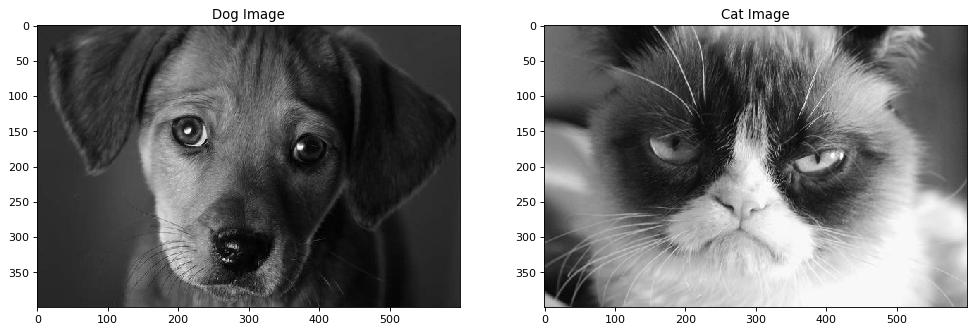

(400, 600) (400, 600)


In [4]:
# Crop cat to match dimensions
cat = cat[38:, 90:-90]
# Plot images 
fig=plt.figure(figsize=(15, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(dog, cmap='gray')
plt.title('Dog Image')
plt.subplot(1,2,2)
plt.imshow(cat, cmap='gray')
plt.title('Cat Image')
plt.show()
print(dog.shape, cat.shape)

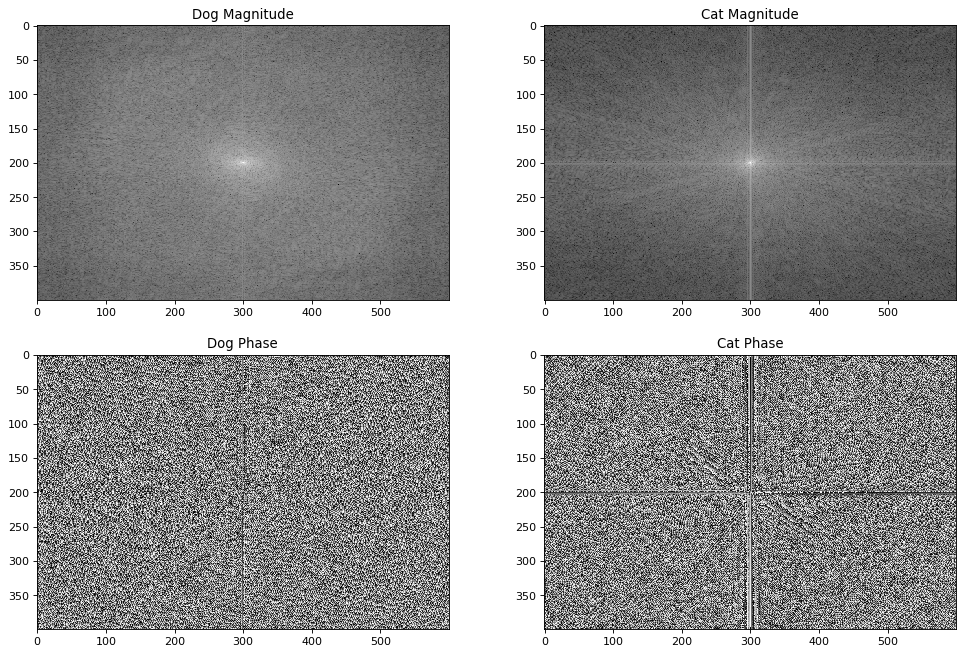

In [5]:
# FFT of images 
dog_f = np.fft.fft2(dog)
cat_f = np.fft.fft2(cat)
# Magnitude of images
dog_mag = np.abs(dog_f)
cat_mag = np.abs(cat_f)
# Phase of images
dog_phase = np.angle(dog_f)
cat_phase = np.angle(cat_f)
# Combine Dog Magnitude with Cat Phase
Y1 = np.multiply(dog_mag, np.exp(1j*cat_phase))
# Combine Cat Magnitude with Dog Phase
Y2 = np.multiply(cat_mag, np.exp(1j*dog_phase))

# Plot Magnitude and Phase
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.imshow(np.fft.fftshift(np.log(dog_mag)), cmap='gray')
plt.title('Dog Magnitude')
plt.subplot(2,2,2)
plt.imshow(np.fft.fftshift(np.log(cat_mag)), cmap='gray')
plt.title('Cat Magnitude')
plt.subplot(2,2,3)
plt.imshow(np.fft.fftshift(dog_phase), cmap='gray')
plt.title('Dog Phase')
plt.subplot(2,2,4)
plt.imshow(np.fft.fftshift(cat_phase), cmap='gray')
plt.title('Cat Phase')
plt.show()

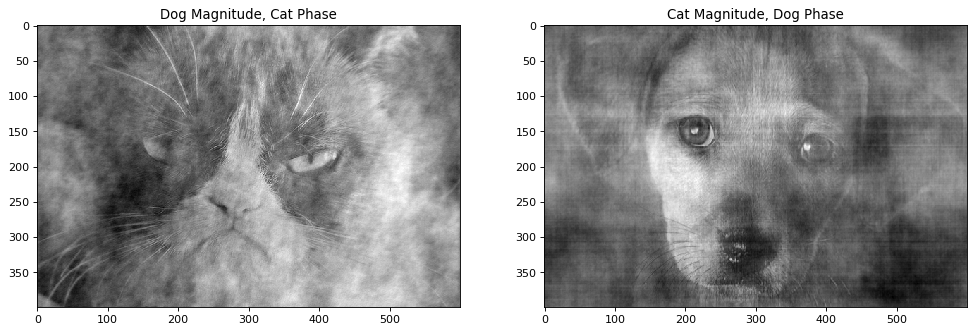

In [6]:
# Inverse FFT of Dog Magnitude, Cat Phase image
dogM_catP = np.real(np.fft.ifft2(Y1))
# Inverse FFT of Cat Magnitude, Dog Phase image
catM_dogP = np.real(np.fft.ifft2(Y2))
# Plot images
fig=plt.figure(figsize=(15, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(dogM_catP, cmap='gray')
plt.title('Dog Magnitude, Cat Phase')
plt.subplot(1,2,2)
plt.imshow(catM_dogP, cmap='gray')
plt.title('Cat Magnitude, Dog Phase')
plt.show()

In [7]:
##################################################################################################

########## Section 5.d - Hybrid Images ###########################################################

In [8]:
# Determine Low-Pass Filter kernel
kern_lp = np.ones((25,25)) / 625
# Determine padding dimensions
m_pad = (dog.shape[0] - kern_lp.shape[0])
n_pad = (dog.shape[1] - kern_lp.shape[1])
# Zero-Pad kernel
kern_lp_pad = np.pad(kern_lp, (((m_pad+1)//2,m_pad//2),((n_pad+1)//2,n_pad//2)), 'constant')
# Shift kernel
kern_lp_pad = np.fft.ifftshift(kern_lp_pad)

# Define High-Pass Filter Kernel
kern_hp = np.ones((9,9)) * -1; kern_hp[4,4] = kern_hp[4,4]*-80
# Determine padding dimensions
m_pad = (cat.shape[0] - kern_hp.shape[0])
n_pad = (cat.shape[1] - kern_hp.shape[1])
# Zero pad kernel
kern_hp_pad = np.pad(kern_hp, (((m_pad+1)//2,m_pad//2),((n_pad+1)//2,n_pad//2)), 'constant')
kern_hp_pad = np.fft.ifftshift(kern_hp_pad)

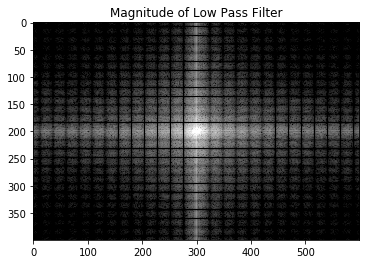

In [9]:
# FFT of Low-Pass kernel
kern_fLP = np.fft.fft2(kern_lp_pad)
# Multiply Cat and LP kernel in frequency
img_f_filter = cat_f * kern_fLP
# Shift to display
img_f_filtshift = np.fft.fftshift(img_f_filter)
# Switch Zeros to very small number to avoid log(0)
img_f_filtshift[np.where(img_f_filtshift==0)] = 1 * 10**-10
# Plot Magnitude
plt.imshow(20 * np.log(np.abs(img_f_filtshift)), vmin=0, vmax=255, cmap='gray')
plt.title('Magnitude of Low Pass Filter')
plt.show()

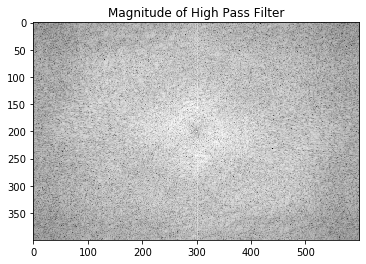

In [10]:
# FFT of High-Pass kernel
kern_fHP = np.fft.fft2(kern_hp_pad)
# Multiply Dog and HP kernel in frequency
img_f2_filter = dog_f * kern_fHP
# Shift to display
img_f2_filtshift = np.fft.fftshift(img_f2_filter)
# Plot Magnitude
plt.imshow(20 * np.log(np.abs(img_f2_filtshift)), cmap='gray')
plt.title('Magnitude of High Pass Filter')
plt.show()

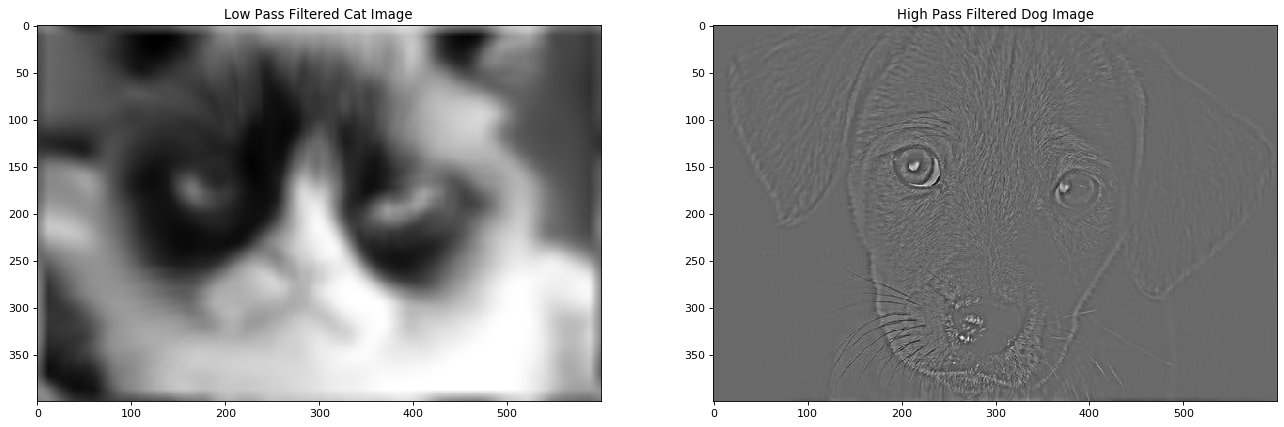

In [11]:
# Inverse FFT of Low-Pass Cat
img_filter1 = np.real(np.fft.ifft2(img_f_filter))
# Normalize
img_filter1 = 255*(img_filter1-np.amin(img_filter1))/(np.amax(img_filter1)-np.amin(img_filter1))
# Inverse FFT of High-Pass Dog
img_filter2 = np.real(np.fft.ifft2(img_f2_filter))
# Normalize
img_filter2 = 255*(img_filter2-np.amin(img_filter2))/(np.amax(img_filter2)-np.amin(img_filter2))
# Plot images
fig=plt.figure(figsize=(20, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(img_filter1, cmap='gray')
plt.title('Low Pass Filtered Cat Image')
plt.subplot(1,2,2)
plt.imshow(255*(img_filter2-np.amin(img_filter2))/(np.amax(img_filter2)-np.amin(img_filter2)), cmap='gray')
plt.title('High Pass Filtered Dog Image')
plt.show()

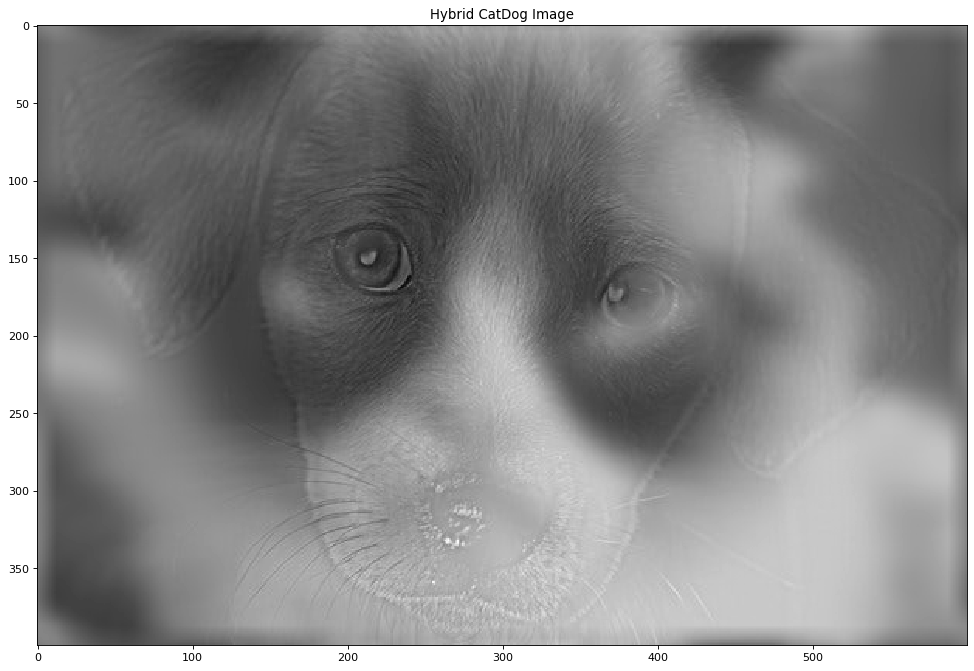

In [30]:
# Combine Images
img_hyb = 0.5*img_filter1 + 0.5*img_filter2
# Plot Hybrid Image
fig=plt.figure(figsize=(15, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img_hyb, cmap='gray')
plt.title('Hybrid CatDog Image')
plt.show()

In [31]:
cv2.imwrite('./output_images/catdog_hybrid.png', img_hyb.astype('uint8'))

True